# Titanic Data Science Project

## Workflow stages

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Conclusion.

## Question and problem definition

> Can our model, trained on a dataset comprising passenger profiles with survival outcomes from the Titanic disaster, accurately predict the survival status of passengers in a separate test dataset that lacks survival information?

Overview facts:

- During its voyage on April 15, 1912, the Titanic tragically sank following a collision with an iceberg, resulting in the loss of 1502 lives out of a total of 2224 passengers and crew, resulting in a survival rate of approximately 32%.
- A contributing factor to the significant loss of life during this shipwreck was the insufficient number of lifeboats available for passengers and crew.
- While luck played a role in survival, certain demographic groups, such as women, children, and the upper-class, had higher chances of surviving the disaster compared to others.

## Workflow goals

The data science project workflow addresses seven primary objectives:

**Classification**: Our task involves categorizing and grouping our samples. Additionally, we may seek to comprehend the significance or associations between various classes and our ultimate solution objective.

**Correlation**: In tackling the problem, it's possible to take an approach that relies on the features present in the training dataset. We need to discern which features in the dataset have a substantial impact on achieving our solution objective. From a statistical standpoint, we should investigate whether there exists a correlation between a feature and the solution goal. In other words, as the values of a feature change, does the solution status change correspondingly, and vice versa? This examination can be conducted for both numerical and categorical features in the provided dataset.

**Conversion**: During the modeling stage, data preparation is essential. Depending on the selected model algorithm, it may be necessary to convert all features into numerical equivalents. This includes converting text and categorical values into numeric representations, ensuring compatibility with the chosen modeling technique.

**Filling missing data**:The data preparation process might also entail the task of estimating or filling in any missing values within a feature. Many model algorithms tend to perform optimally when there are no missing data points.

**Inspecting and correcting data**: Another crucial step involves carefully examining the provided training dataset for errors or potentially inaccurate values within its features. Our aim is to rectify these values or eliminate the samples containing errors. One approach is to identify any outliers among our samples or features. Additionally, we may choose to entirely remove a feature if it does not contribute meaningfully to the analysis or has the potential to significantly skew the results.

**Feature engineering**: Is it possible to generate additional features derived from an existing feature or a group of features in a way that aligns with the objectives of correlation, conversion, and completeness?

**Visualizing the results**: Selecting the right visualization plots and charts depending on nature of the data and the solution goals.

## Uploading tools for data analysis, visualization and machine learning


In [2]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Retrieve the data

The Python Pandas library assists us in managing our datasets. Our initial step involves importing the training and testing datasets into Pandas DataFrames. Additionally, we can merge these datasets to perform specific operations on both datasets simultaneously.

In [4]:
train = pd.read_csv('/content/drive/MyDrive/DTSA_5509/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DTSA_5509/test.csv')
df = [train, test]

## Analyze by describing data

**Here are the features which are available in the dataset:**


In [5]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Here are the types of feature we have in dataset:

- Categorical features: Survived, Sex, and Embarked. Ordinal: Pclass.

- Numerical features: Continous: Age, Fare. Discrete: SibSp, Parch.

In [6]:
# preview the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [7]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
train.columns[train.isnull().any()], test.columns[test.isnull().any()]

(Index(['Age', 'Cabin', 'Embarked'], dtype='object'),
 Index(['Age', 'Fare', 'Cabin'], dtype='object'))

In [10]:
train_null_values = train.isnull().sum()

print("Null values in the DataFrame per column:", train_null_values)

Null values in the DataFrame per column: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
test_null_values = test.isnull().sum()

print("Null values in the DataFrame per column:", test_null_values)

Null values in the DataFrame per column: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**It looks like few features contain blank, null or empty values**

- ***Cabin, Age, Embarked*** features contain a number of null values in that order for the training dataset.
- ***Cabin,  Age, Fare*** are incomplete in case of test dataset.

**What are the data types for various features?**

- Seven features are integer or floats. Six in case of test dataset.
- Five features are strings (object).

In [12]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**How are the numerical feature values distributed among the different samples?**

This aids us in assessing, among other initial observations, the extent to which the training dataset accurately represents the real-world problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 50% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What insights can we gather about the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [14]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Assumtions based on data analysis

Based on the data analysis conducted thus far, we have formulated the following assumptions. We should consider further validation of these assumptions before proceeding with any necessary actions:

**Correlation:**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Filling missing data:**

1. Filling in the Age feature is a priority, given its clear correlation with survival.
2. We may want to fill in the Embarked feature as it may also correlate with survival or another important feature.

**Correcting:**

1. The "Ticket" feature could potentially be excluded from our analysis due to its high proportion of duplicates (22%) and a potential lack of correlation between "Ticket" and survival.

2. The "Cabin" feature might be dropped because it is significantly incomplete and contains numerous null values in both the training and test datasets.

3. "PassengerId" may be considered for removal from the training dataset as it does not seem to have a direct influence on survival.

4. The "Name" feature, being relatively non-standard, may not directly contribute to survival and might be a candidate for exclusion.

**Feature Engineering:**

1. Consider creating a new feature named "Family" by combining "Parch" and "SibSp" to calculate the total count of family members on board.

2. Explore the possibility of engineering the "Name" feature to extract and create a new feature for the titles of passengers.

3. Think about creating a new feature for "Age bands." This transformation converts the continuous numerical feature "Age" into an ordinal categorical feature, which can be useful for analysis.

4. Evaluate whether it's beneficial to create a feature for "Fare ranges." This could help in grouping fares into specific ranges to simplify the analysis and capture potential patterns in ticket prices.

**Classification:**

In addition to the previous assumptions, we can make the following additional assumptions based on the problem description:

1. Women (Sex=female) were more likely to have survived.
2. Children (Age < some threshold) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived.

## Analyze features through pivoting

To validate certain observations and assumptions, we can efficiently assess the correlations between our features by creating pivot tables and comparing them.

- **Pclass** I observe significant correlation (>0.6) among Pclass=1 and Survived (classification #3). I decide to include this feature in our model.
- **Sex** I confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classification #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to generate a feature or a set of features from these individual features (Feature Engineeringting #1).

In [15]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features

Let's commence by exploring the correlations between numerical features and our target variable (Survived).

A histogram chart will assist us in addressing inquiries concerning specific age groups (e.g., Did infants have a higher survival rate?).

Please note that in histogram visualizations, the y-axis represents the count of passengers.

**Key Insights.**

- Infants (Age <= 5) displayed a notably high survival rate.
- Even the oldest passengers (Age > 75) managed to survive.
- A significant number of passengers between the ages of 15 and 30 did not survive.
- The majority of passengers fall within the 15-35 age range.

**Decisions.**

The simple analysis validates our earlier assumptions and guides our decisions for the following workflow stages:

- Age should be considered as a relevant feature in our model training, confirming our assumption #2.
- We need to address the missing values in the Age feature (addressing assumption #1).
- Age groups should be created to segment passengers into bands (implementing assumption #3).

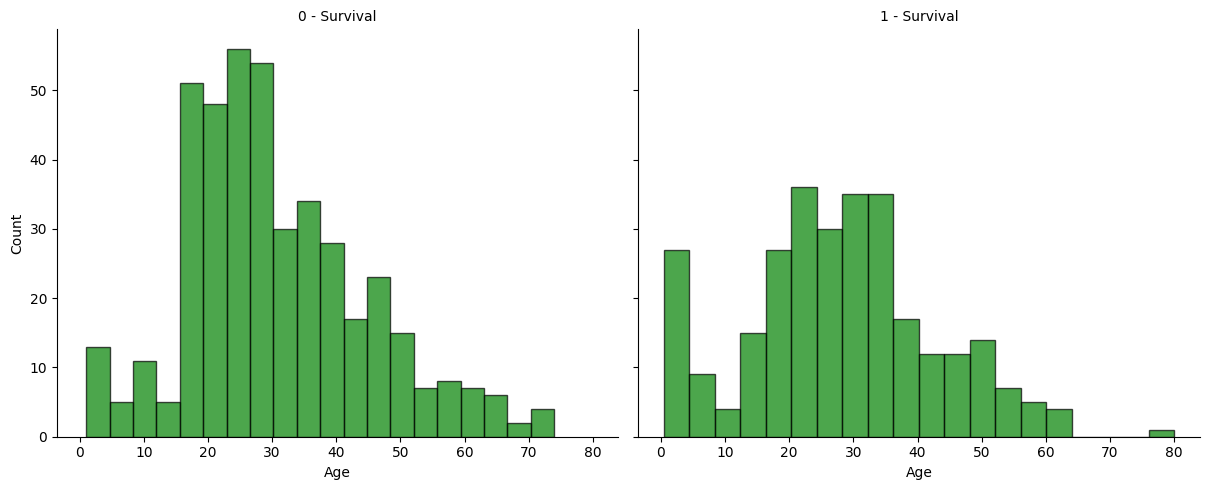

In [19]:
hist = sns.FacetGrid(train, col='Survived', height=5, aspect=1.2)

hist.map(plt.hist, 'Age', bins=20, color='green', alpha=0.7, edgecolor='black')

hist.set_axis_labels("Age", "Count")
hist.set_titles("{col_name} - Survival")

plt.show()

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

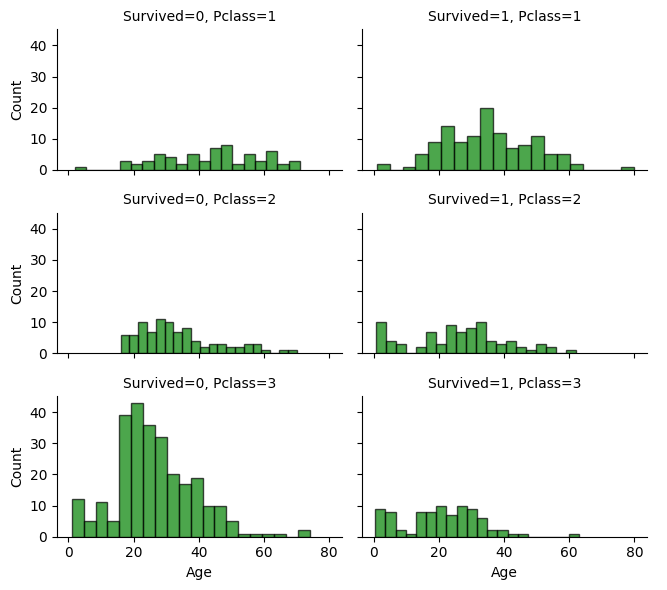

In [20]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.7, bins=20, color='green', edgecolor='black')
grid.add_legend()

grid.set_axis_labels("Age", "Count")
grid.set_titles("Survived={col_name}, Pclass={row_name}")

plt.show()

### Correlating categorical features

Now, let's explore the correlations between categorical features and our target variable.

**Key Observations**

- Female passengers exhibited a significantly higher survival rate than their male counterparts, which aligns with our initial classification assumption (#1).
- There's an interesting exception in the case of Embarked=C, where males had a higher survival rate. This observation suggests a potential correlation between Pclass, Embarked, and, consequently, Pclass and Survived, rather than a direct correlation between Embarked and Survived.
- Among male passengers, those in Pclass=3 had a better survival rate compared to Pclass=2 for ports C and Q. This finding may relate to missing values (#2).
- The ports of embarkation show varying survival rates, especially for Pclass=3 and among male passengers, indicating a potential correlation with the target variable (#1).

**Decisions**

1. We should include the 'Sex' feature in our model training due to its significant influence on survival.
2. The 'Embarked' feature needs to be completed and incorporated into our model training as well.






/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


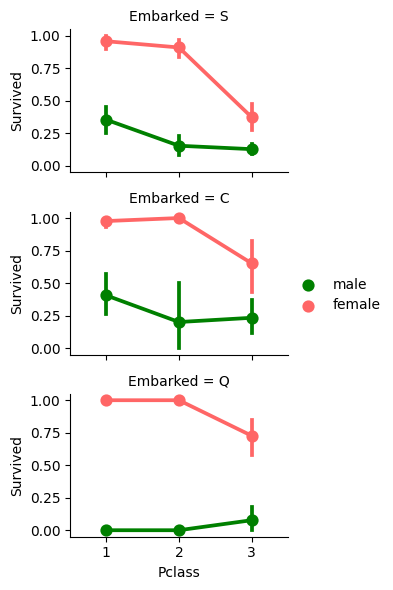

In [21]:
grid = sns.FacetGrid(train, row='Embarked', height=2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette={'male': 'green', 'female': '#FF6666'})
grid.add_legend()

### Correlating categorical and numerical features

We should also explore the correlations between categorical features (with non-numeric values) and numeric features. Specifically, we can investigate the relationships between 'Embarked' (Categorical non-numeric), 'Sex' (Categorical non-numeric), 'Fare' (Numeric continuous), and 'Survived' (Categorical numeric).

**Key Observations**

- Passengers who paid higher fares generally had a higher survival rate, which supports our initial assumption of creating fare ranges (#4).
- The port of embarkation shows correlations with survival rates, confirming our plans to correlate (#1) and complete (#2).

**Decisions**

1. We should consider grouping the 'Fare' feature into bands to further analyze its relationship with survival.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


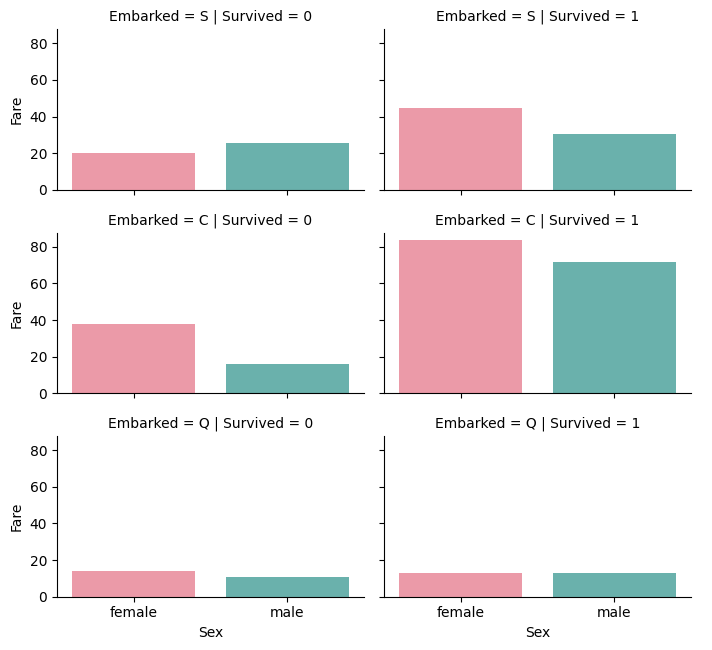

In [22]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height =2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.8, errorbar=None, palette='husl')
grid.add_legend()

## Wrangle, prepare, cleanse the data

We've gathered multiple assumptions and made decisions based on our dataset and solution needs, all without needing to alter any features or values. Now, it's time to put our decisions and assumptions into action, addressing tasks related to correcting, creating, and completing data to meet our goals.

### Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features on both train and test datasets to be consistent.



In [23]:
print("Before", train.shape, test.shape, df[0].shape, df[1].shape)

train_new = train.drop(['Ticket', 'Cabin'], axis=1)
test_new = test.drop(['Ticket', 'Cabin'], axis=1)
df_new = [train_new, test_new]

"After", train_new.shape, test_new.shape, df_new[0].shape, df_new[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Creating new feature extracting from existing

I want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

**Key Observations**

When we plot Title, Age, and Survived, we note the following observations.

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision**

- I decide to retain the new Title feature for model training.

In [24]:
for dataset in df_new:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_new['Title'], train_new['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`.

In [25]:
for dataset in df_new:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_new[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in df_new:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [27]:
train_final = train_new.drop(['Name', 'PassengerId'], axis=1)
test_final = test_new.drop(['Name'], axis=1)
combine = [train_final, test_final]
train_final.shape, test_final.shape

((891, 9), (418, 9))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [28]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [29]:
test_final.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


### Completing a numerical continuous feature

Now it's time to begin the process of estimating and filling in missing or null values for our features. We'll start by addressing the missing values in the 'Age' feature.

A more precise method for making educated guesses about missing values involves leveraging information from other related features. In our specific case, we've observed correlations among 'Age,' 'Gender,' and 'Pclass.' To estimate the missing 'Age' values, we'll calculate the median age values for different combinations of 'Pclass' and 'Gender' features. This means we'll calculate the median age for individuals in Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on.


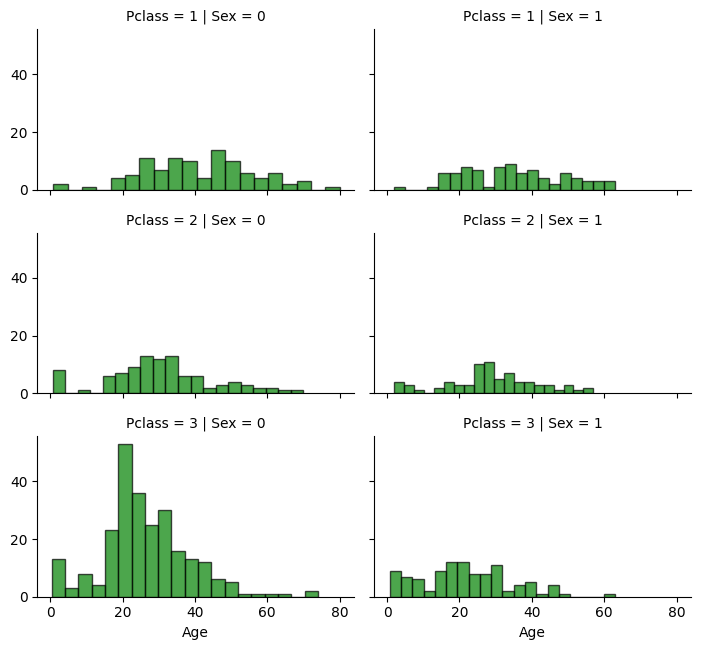

In [30]:
grid = sns.FacetGrid(train_final, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.7, bins=20, color='green', edgecolor='black')
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [31]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [32]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()


            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [33]:
train_final.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

Let us create Age bands and determine correlations with Survived.

In [34]:
train_final['AgeBand'] = pd.cut(train_final['Age'], 5)
train_final[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [35]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [36]:
train_final = train_final.drop(['AgeBand'], axis=1)
combine = [train_final, test_final]
train_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [37]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_final[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [38]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_final[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [39]:
train_final = train_final.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_final = test_final.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_final, test_final]

train_final.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [40]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_final.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [41]:
freq_port = train_final.Embarked.dropna().mode()[0]
freq_port

'S'

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_final[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the Embarked feature by creating a new numeric Port feature.

In [43]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_final.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using median to get robust measure of central tendency and is not heavily influenced by extreme values.We may also want round off the fare to two decimals as it represents currency.

In [44]:
test_final.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [45]:
test_final['Fare'].fillna(test_final['Fare'].dropna().median().round(2), inplace=True)
test_final.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [46]:
test_final.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

We can now create FareBand.

In [47]:
train_final['FareBand'] = pd.qcut(train_final['Fare'], 4)
train_final[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [48]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_final = train_final.drop(['FareBand'], axis=1)
combine = [train_final, test_final]

train_final.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.

In [49]:
test_final.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, predict and solve

Now, we're prepared to proceed with model training and prediction, but with over 60 predictive modeling algorithms available, we need to make informed choices. To do that, we consider the nature of our problem and the specific requirements for our solution. Our task falls into both classification and regression categories. We aim to establish relationships between the outcome (Survived or not) and various input variables or features (such as Gender, Age, Port...). Additionally, we are engaged in a specific category of machine learning known as supervised learning, as we are training our model using a provided dataset.

Given these criteria, which are supervised learning, and the combination of classification and regression tasks, we can narrow down our selection of models to a handful. Some of these models include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [50]:
X_train = train_final.drop("Survived", axis=1)
Y_train = train_final["Survived"]
X_test  = test_final.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a valuable model to include in the initial stages of our analysis. It assesses the connection between a categorical dependent variable (a feature) and one or multiple independent variables (features) by estimating probabilities through a logistic function, specifically the cumulative logistic distribution.

Note the confidence score generated by the model based on our training dataset.

In [51]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, Y_train) * 100, 2)
print(f"Logistic Regression score: {acc_log}")

Logistic Regression score: 81.37


We can employ Logistic Regression to validate our assumptions and decisions concerning feature creation and completion objectives. This validation is accomplished by computing the coefficients associated with each feature within the decision function.

Positive coefficients amplify the log-odds of the response (and, consequently, augment the probability), while negative coefficients diminish the log-odds of the response (and, hence, reduce the probability).

For instance, the Sex feature exhibits the highest positive coefficient, suggesting that as the Sex value increases (from male: 0 to female: 1), the probability of Survived=1 experiences the most significant increase.
Then, as Pclass increases, the probability of Survived=1 experiences the most substantial decrease.
In this context, Age*Class emerges as a valuable engineered feature, as it exhibits the second-highest negative correlation with Survived.
Similarly, Title exhibits the second-highest positive correlation, making it another relevant feature in our analysis.

In [52]:
coeff_df = pd.DataFrame(train_final.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


Moving forward, we will utilize Support Vector Machines (SVMs), which are supervised learning models accompanied by algorithms designed for classification and regression tasks. SVMs excel at analyzing data to classify it into two distinct categories. When presented with a training dataset, an SVM training algorithm constructs a model that categorizes new test samples into one of these two categories. Essentially, it operates as a non-probabilistic binary linear classifier.

Note that the model generates a confidence score which is lower than Logistics Regression model.

In [53]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(f"Support Vector Machines score: {acc_svc}")

Support Vector Machines score: 82.83


In pattern recognition, the k-Nearest Neighbors algorithm, often abbreviated as k-NN, is a versatile non-parametric method used for classification and regression tasks. This algorithm relies on the collaborative decision-making of neighboring data points. When classifying or predicting a sample, it identifies its k closest neighbors from the dataset using a similarity measure, such as Euclidean distance. The parameter "k" is typically a small positive integer. The sample is then assigned to the class or given a value that is most prevalent among these k nearest neighbors. For instance, when k = 1, it assigns the sample to the class of its single closest neighbor, while larger k values consider input from multiple neighbors, enabling more robust decision-making.

KNN confidence score is better than Logistics Regression and SVM.

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(f"k-Nearest Neighbors score: {acc_knn}")

k-Nearest Neighbors score: 83.73


In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

The model generated confidence score is the lowest among the models evaluated so far.

In [55]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(f"Gaussian Naive Bayes score: {acc_gaussian}")

Gaussian Naive Bayes score: 76.88


The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [56]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(f"Perceptron score: {acc_perceptron}")

Perceptron score: 79.35


In [57]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(f"Linear SVC score: {acc_linear_svc}")

Linear SVC score: 79.46


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [58]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(f"Stochastic Gradient Descent score: {acc_sgd}")

Stochastic Gradient Descent score: 80.13


This model employs a decision tree as its predictive framework, where features are mapped to specific conclusions regarding the target value. In this tree-based model, known as a decision tree, branches symbolize the features, while leaves correspond to conclusions about the target variable. When the target variable can assume a limited set of values, these tree structures are termed classification trees, with leaves signifying class labels and branches representing combinations of features that lead to these labels. On the other hand, when the target variable encompasses continuous values, often real numbers, these trees are referred to as regression trees.

The model confidence score is the highest among models evaluated so far.

In [66]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(f"Decision tree score: {acc_decision_tree}")

Decision tree score: 86.64


The subsequent model, Random Forests, stands as one of the most widely adopted techniques in machine learning. Random Forests, or random decision forests, belong to the category of ensemble learning methods, serving various purposes such as classification, regression, and more. These models function by creating a diverse assembly of decision trees during the training phase, often generating a substantial number of trees (typically 100), and subsequently making predictions based on the mode of classes (for classification tasks) or the mean prediction (for regression tasks) derived from these individual trees.

The model confidence score is the same as Decision_tree model.

In [68]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(f"Random forest score: {acc_random_forest}")

Random forest score: 86.64


### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [61]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,83.73
0,Support Vector Machines,82.83
2,Logistic Regression,81.37
6,Stochastic Gradient Decent,80.13
7,Linear SVC,79.46
5,Perceptron,79.35
4,Naive Bayes,76.88


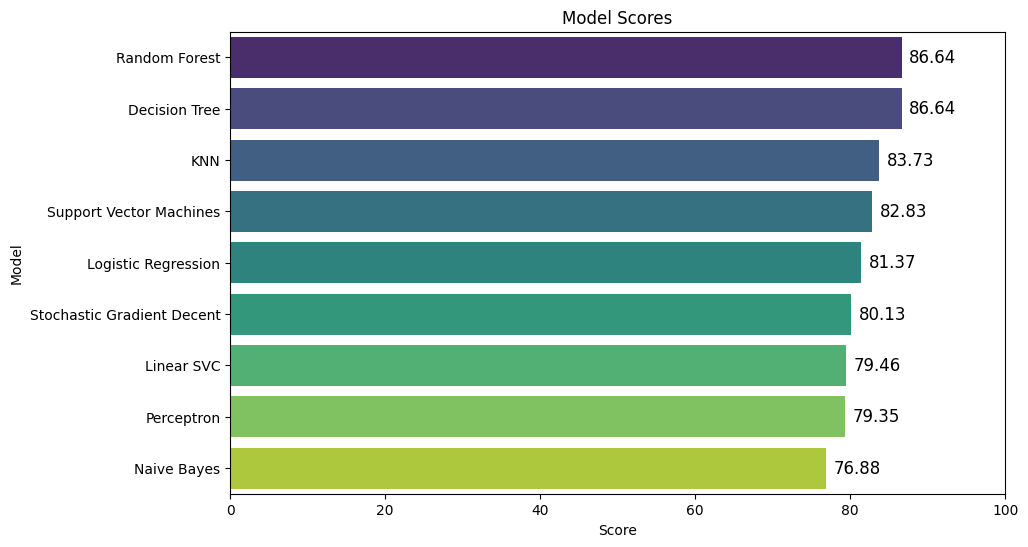

In [64]:
models = models.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Score", y="Model", data=models, palette="viridis")
plt.xlabel("Score")
plt.ylabel("Model")
plt.title("Model Scores")
plt.xlim(0, 100)

for i, score in enumerate(models["Score"]):
    plt.text(score + 1, i, f"{score:.2f}", va="center", fontsize=12)

plt.show()

## Results of Cross-Validation:

We conducted cross-validation to assess the performance of our machine learning model on the training dataset. The cross-validation scores for each fold are as follows: [0.81005587 0.79775281 0.85393258 0.79775281 0.81460674]. These scores represent the accuracy of our model in predicting passenger survival on the Titanic dataset for each fold of the cross-validation process.

**Mean Accuracy:**

The mean accuracy across all folds is calculated to be approximately 0.8171. This value indicates the overall performance of our model on the training data, with an average accuracy of around 81.48%. It suggests that our model's predictions align well with the actual outcomes, capturing the underlying patterns in the data.

**Standard Deviation of Accuracy:**

The standard deviation of accuracy is approximately 0.02. This metric measures the variability or spread of accuracy scores across different folds. A lower standard deviation indicates that the model's performance is relatively consistent across folds, which is desirable. In our case, the modest standard deviation suggests that our model's accuracy is stable and not highly sensitive to variations in the training data.

In summary, our cross-validation results demonstrate that our machine learning model exhibits strong predictive performance on the training dataset, with an average accuracy of approximately 81.48%. The low standard deviation indicates a consistent and stable model. These findings are promising and suggest that our model has the potential to generalize well to unseen data, making it a viable candidate for predicting passenger survival in the Titanic disaster. However, it's essential to keep in mind that these results are based on the training data, and further evaluation on a separate validation or test dataset is necessary to assess the model's real-world performance.

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = RandomForestClassifier()

num_splits = 5

cross_validator = KFold(n_splits=num_splits, shuffle=True, random_state=42)

scores = cross_val_score(model, X_train, Y_train, cv=cross_validator, scoring='accuracy')

print("Cross-Validation Scores:", scores)

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

# Print the mean and standard deviation
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-Validation Scores: [0.81005587 0.79775281 0.85393258 0.79775281 0.81460674]
Mean Accuracy: 0.8148201619484026
Standard Deviation of Accuracy: 0.02066453347559645


## Conclusion

The analysis presented here focuses on evaluating the performance of various machine learning models in predicting the survival status of Titanic passengers in a test dataset where survival information is not provided. Several models were trained on a labeled training dataset and subsequently applied to the test dataset to make predictions. The results indicate that both the Random Forest and Decision Tree models achieved the highest accuracy scores, both scoring at 86.64%. This suggests that these ensemble learning methods are particularly well-suited for this classification task. The K-Nearest Neighbors (KNN) model also performed well, achieving an accuracy score of 83.73%. Logistic Regression and Linear Support Vector Classification (Linear SVC) achieved scores of 81.37% and 79.46%, respectively, indicating their effectiveness in this context. However, it's worth noting that not all models performed equally well, with Naive Bayes scoring lowest. This analysis underscores the importance of selecting an appropriate machine learning model for a given task, as different algorithms have varying degrees of suitability. Aslo our analysis and modeling efforts on the Titanic dataset have provided valuable insights and promising results using cross-validation, we evaluated the performance of our best machine learning model (random Forest) on the training dataset and obtained the very consistent and satisfying results.

**Discussion of Why Something Didn't Work or Suggestions for Improvement:**

While most models demonstrated strong predictive capabilities, it's essential to recognize that predictive accuracy is not the only metric to consider. Further analysis could explore other evaluation metrics such as precision, recall, and F1-score, especially if there is a class imbalance in the dataset. Additionally, feature engineering and selection can significantly impact model performance. Experimenting with different feature engineering techniques and selecting the most informative features may lead to improved results. Moreover, hyperparameter tuning for each model could further enhance their predictive power. Finally, ensemble methods, such as model stacking or blending, could be explored to combine the strengths of multiple models and potentially achieve even higher accuracy and robustness in predicting survival outcomes.

In conclusion, the analysis demonstrates the potential of machine learning models to predict survival outcomes for Titanic passengers in a test dataset lacking survival information. It also highlights the importance of model selection, feature engineering, and hyperparameter tuning in optimizing predictive performance. Continuing to refine and fine-tune these models may lead to even more accurate predictions and valuable insights into the factors influencing passenger survival during the Titanic disaster.